# **Kalp Hastalığı Risk Analizi**

In [60]:
# Kullanacağımız kütüphaneleri yükleyelim

# ✅ Veri İşleme ve Görselleştirme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Veri Ön İşleme
from sklearn.impute import SimpleImputer       # Eksik verileri doldurmak için.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, label_binarize

# ✅ Modelleme Araçları
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier

# ✅ Modeller
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ✅ Model Değerlendirme
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

# ✅ Uyarı Gizleme
import warnings
warnings.filterwarnings("ignore")

In [61]:
# Veri setini yükleyelim
df = pd.read_csv('/content/drive/MyDrive/heart_disease_project/heart_disease_uci.csv')
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [62]:
# 'num' sütununda bulunan tüm benzersiz değerleri listeleyelim.

display(df['num'].unique())

array([0, 2, 1, 3, 4])

In [63]:
df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

In [64]:
df.drop('num', axis=1, inplace=True)

In [65]:
X = df.drop('target', axis=1)
y = df['target']

#### **1. Problem Tanımı**

- Hangi veri seti seçildi?

  Bu projede "UCI Heart Disease Data" veri setini seçtim. Veri seti, bireylerin yaş, cinsiyet, kan basıncı, kolesterol düzeyi, maksimum kalp atış hızı gibi çeşitli sağlık göstergelerini içermektedir. Her birey için kalp hastalığı tanısının olup olmadığı bilgisi de yer almaktadır.

- Problemin amacı nedir? Hedef değişken nedir?
  
  Bu projenin amacı, bireylerin sahip olduğu tıbbi verilere dayanarak kalp hastalığına sahip olup olmadığını makine öğrenmesi modelleri yardımıyla tahmin etmektir.
  Bu bir çok sınıflı sınıflandırma (multi-class classification) problemidir.

  Hedef değişken (target variable) num sütunudur:
    
  0	--> Kalp hastalığı yok
    
  1	--> Hafif kalp hastalığı
  
  2	--> Orta düzeyde kalp hastalığı
  
  3	--> İleri düzeyde kalp hastalığı

  4 --> Çok ileri düzeyde hastalık

- Bu tahminin pratikteki önemi nedir?

  Kalp hastalıkları dünya genelinde en sık görülen ölüm nedenleri arasındadır. Bu nedenle, bireylerin risk altında olup olmadığının erken tespit edilmesi hayati önem taşır.

  Pratikteki önemi şunlardır:
  
  -- Riskli bireylerin daha erken fark edilmesini sağlar.
  
  -- Kendi sağlık verilerine sahip olan bireyler risk durumlarını tahmini olarak öğrenebilir.
  
  -- Doktorlara tanı koyma sürecinde destekleyici analiz sunabilir.

#### **2. Veri Analizi ve Görselleştirme (EDA)**

In [68]:
# Veri setinin genel bilgileri

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  target    920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [69]:
# Veri setinin istatistiksel özeti

df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [70]:
# Eksik veri kontrolü
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

# Sadece eksik değerleri olan sütunları seç
missing_values_filtered = missing_values[missing_values > 0]
missing_values_percentage_filtered = missing_values_percentage[missing_values_percentage > 0]

# Eksik veri olan sütunların veri tiplerini al
missing_data_types = df[missing_values_filtered.index].dtypes

# Eksik oranı, sayısı ve veri tipini birlikte birleştir
missing_data_summary = pd.concat([missing_values_filtered, missing_values_percentage_filtered, missing_data_types], axis=1, keys=['Eksik Değer Sayısı', 'Eksik Oranı (%)', 'Veri Tipi'])

# Sonuçları yazdır
print("Eksik Değer Özeti (Sadece Eksik Veri Olan Sütunlar):")
display(missing_data_summary)

Eksik Değer Özeti (Sadece Eksik Veri Olan Sütunlar):


,Eksik Değer Sayısı,Eksik Oranı (%),Veri Tipi
trestbps,59,6.413043,float64
chol,30,3.260870,float64
fbs,90,9.782609,object
restecg,2,0.217391,object
thalch,55,5.978261,float64
exang,55,5.978261,object
oldpeak,62,6.739130,float64
slope,309,33.586957,object
ca,611,66.413043,float64
thal,486,52.826087,object


In [71]:
# Sayısal sütunları ve eksik değer olanları belirle
# missing_data_summary, bir önceki adımda eksik verileri olan sütunları ve tiplerini içeriyor
numerical_cols_with_missing = missing_data_summary[missing_data_summary['Veri Tipi'] != 'object'].index.tolist()
categorical_cols_with_missing = missing_data_summary[missing_data_summary['Veri Tipi'] == 'object'].index.tolist()

# SimpleImputer kullanarak sayısal eksik değerleri (medyan ile) dolduralım
imputer_numerical = SimpleImputer(strategy='median')
df[numerical_cols_with_missing] = imputer_numerical.fit_transform(df[numerical_cols_with_missing])

# SimpleImputer kullanarak kategorik eksik değerleri (mod ile) dolduralım
imputer_categorical = SimpleImputer(strategy='most_frequent')
df[categorical_cols_with_missing] = imputer_categorical.fit_transform(df[categorical_cols_with_missing])

# Doldurma sonrası eksik değerleri kontrol edelim
print("Doldurma Sonrası Eksik Değer Kontrolü:")
display(df.isnull().sum())

Doldurma Sonrası Eksik Değer Kontrolü:


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


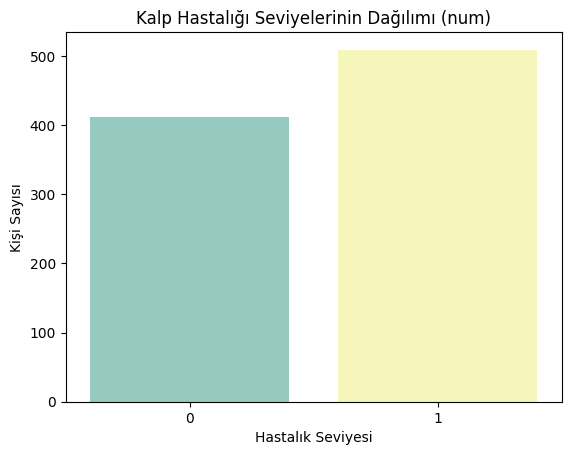

In [72]:
# Hedef değişkenin 'num' dağılımı

sns.countplot(data=df, x="target", palette="Set3")
plt.title("Kalp Hastalığı Seviyelerinin Dağılımı (num)")
plt.xlabel("Hastalık Seviyesi")
plt.ylabel("Kişi Sayısı")
plt.show()

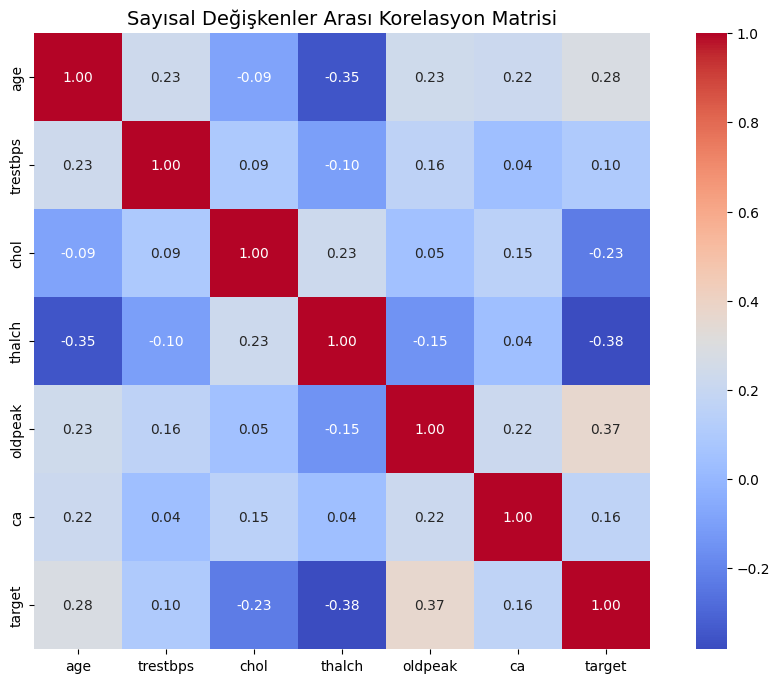

In [73]:
df_cleaned = df.drop('id', axis=1, inplace=False)

# Sayısal sütunları seç
df_numeric = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Korelasyon matrisi hesapla
corr_matrix = df_numeric.corr()

# Görselleştir
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi", fontsize=14)
plt.show()

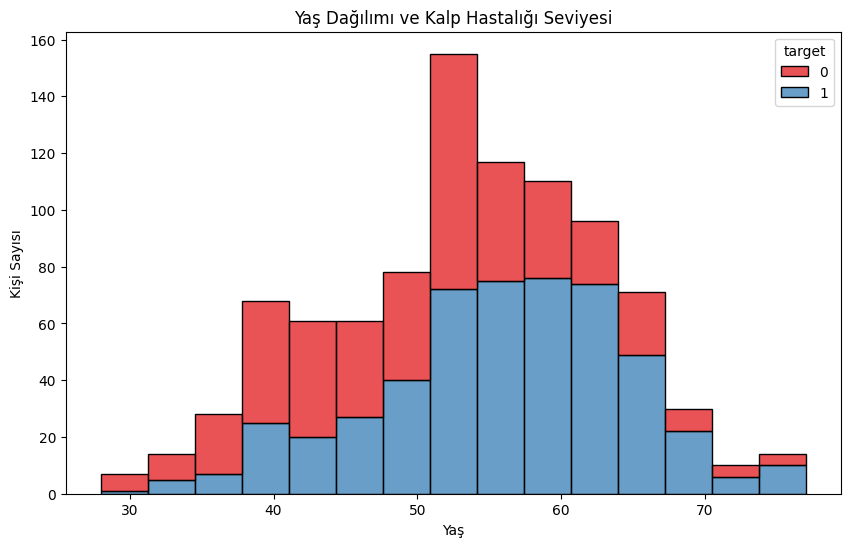

In [74]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_numeric, x="age", hue="target", multiple="stack", bins=15, palette="Set1")
plt.title("Yaş Dağılımı ve Kalp Hastalığı Seviyesi")
plt.xlabel("Yaş")
plt.ylabel("Kişi Sayısı")
plt.show()

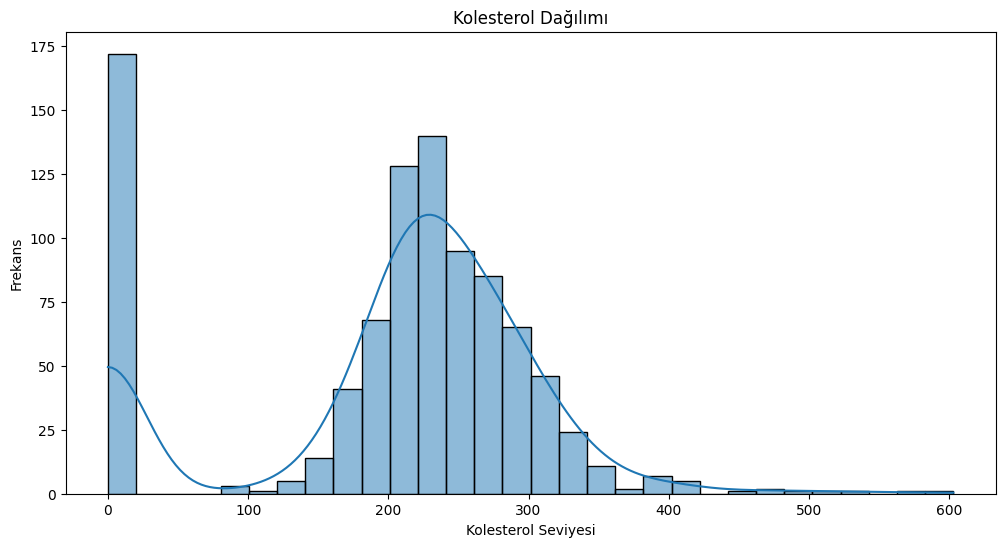

In [75]:
# Kolesterol dağılımı histogramı
plt.figure(figsize=(12, 6))
sns.histplot(df['chol'], bins=30, kde=True)
plt.title('Kolesterol Dağılımı')
plt.xlabel('Kolesterol Seviyesi')
plt.ylabel('Frekans')
plt.show()

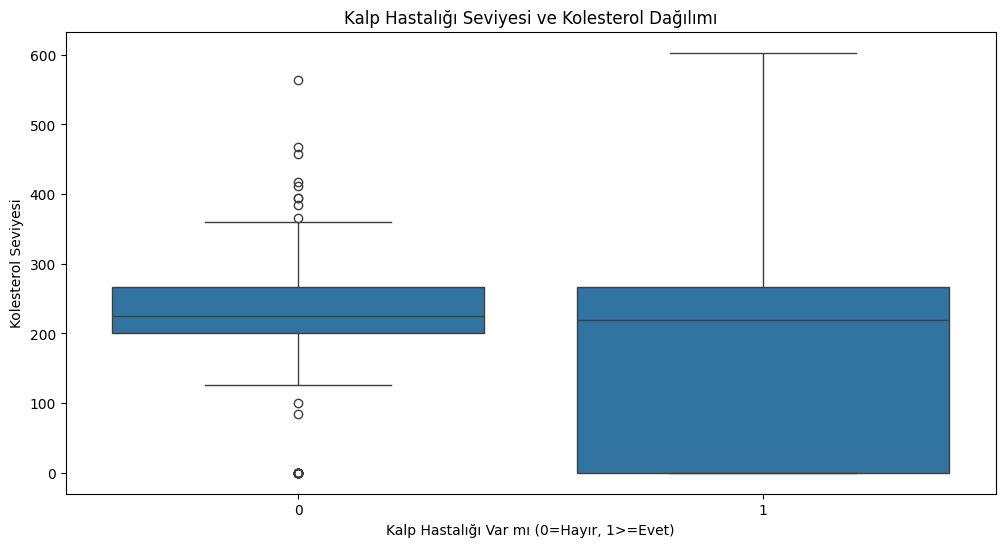

In [76]:
# Kalp hastalığı seviyesine göre kolesterol dağılımı boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Kalp Hastalığı Seviyesi ve Kolesterol Dağılımı')
plt.xlabel('Kalp Hastalığı Var mı (0=Hayır, 1>=Evet)')
plt.ylabel('Kolesterol Seviyesi')
plt.show()

#### **3. Veri Ön İşleme**

In [77]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [78]:
# Gerekli encoding işlemleri (LabelEncoder, OneHotEncoder)

# LabelEncoder uygulanacak sütunlar
label_encode_cols = ['sex', 'dataset', 'fbs', 'exang']

# OneHotEncoder uygulanacak sütunlar (kalan kategorik sütunlar)
all_categorical_cols = df.select_dtypes(include=['object']).columns
one_hot_encode_cols = [col for col in all_categorical_cols if col not in label_encode_cols]

print("LabelEncoder uygulanacak sütunlar:", label_encode_cols)
print("OneHotEncoder uygulanacak sütunlar:", one_hot_encode_cols)

# LabelEncoder uygulayalım
le = LabelEncoder()
for col in label_encode_cols:
    df[col] = le.fit_transform(df[col])

# OneHotEncoder uygulayalım
if one_hot_encode_cols: # Eğer OneHotEncoder uygulanacak sütun varsa
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Kategorik sütunları dönüştür
    encoded_categorical_data = ohe.fit_transform(df[one_hot_encode_cols])

    # Dönüştürülmüş veriyi bir DataFrame'e dönüştür
    encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=ohe.get_feature_names_out(one_hot_encode_cols))

    # Orijinal OneHotEncoder sütunlarını drop et ve dönüştürülmüş sütunları ekle
    df = df.drop(one_hot_encode_cols, axis=1)
    df = pd.concat([df, encoded_categorical_df], axis=1)

print("\nDönüşüm Sonrası DataFrame'in İlk 5 Satırı:")
display(df.head())

LabelEncoder uygulanacak sütunlar: ['sex', 'dataset', 'fbs', 'exang']
OneHotEncoder uygulanacak sütunlar: ['cp', 'restecg', 'slope', 'thal']

Dönüşüm Sonrası DataFrame'in İlk 5 Satırı:


,id,age,sex,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1,63,1,0,145.0,233.0,1,150.0,0,2.3,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,67,1,0,160.0,286.0,0,108.0,1,1.5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,67,1,0,120.0,229.0,0,129.0,1,2.6,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,37,1,0,130.0,250.0,0,187.0,0,3.5,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,41,0,0,130.0,204.0,0,172.0,0,1.4,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [79]:
# Sayısal veriler için gerekirse StandardScaler / MinMaxScaler

# Özellik (X) ve hedef (y) olarak ayır
# 'id' sütununu ve hedef değişken 'num' sütununu özelliklerden çıkarıyoruz
X = df.drop(['id', 'target'], axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Özellik Matrisinin İlk 5 Satırı (Ölçeklendirilmiş):")
display(pd.DataFrame(X_scaled, columns=X.columns).head())
print("\nHedef Değişkenin İlk 5 Değeri:")
display(y.head())

Özellik Matrisinin İlk 5 Satırı (Ölçeklendirilmiş):


,age,sex,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,ca,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1.007386,0.516931,-1.095558,0.705176,0.303643,2.380476,0.489727,-0.760292,1.368109,-0.361400,...,4.358899,1.973225,-1.227523,-0.491493,3.688248,-1.568007,-0.532094,4.358899,-1.692792,-0.513553
1,1.432034,0.516931,-1.095558,1.518569,0.789967,-0.420084,-1.181478,1.315283,0.611589,4.411152,...,-0.229416,1.973225,-1.227523,-0.491493,-0.271131,0.637752,-0.532094,-0.229416,0.590740,-0.513553
2,1.432034,0.516931,-1.095558,-0.650479,0.266939,-0.420084,-0.345875,1.315283,1.651804,2.820301,...,-0.229416,1.973225,-1.227523,-0.491493,-0.271131,0.637752,-0.532094,-0.229416,-1.692792,1.947220
3,-1.752828,0.516931,-1.095558,-0.108217,0.459634,-0.420084,1.961979,-0.760292,2.502889,-0.361400,...,-0.229416,-0.506785,0.814649,-0.491493,3.688248,-1.568007,-0.532094,-0.229416,0.590740,-0.513553
4,-1.328180,-1.934494,-1.095558,-0.108217,0.037541,-0.420084,1.365120,-0.760292,0.517024,-0.361400,...,-0.229416,1.973225,-1.227523,-0.491493,-0.271131,-1.568007,1.879367,-0.229416,0.590740,-0.513553



Hedef Değişkenin İlk 5 Değeri:


,target
0,0
1,1
2,1
3,0
4,0


In [80]:
# Eğitim/test ayrımı (train_test_split, 70-30 ya da 80-20)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Eğitim seti boyutu:", X_train.shape, y_train.shape)
print("Test seti boyutu:  ", X_test.shape,  y_test.shape)

Eğitim seti boyutu: (736, 23) (736,)
Test seti boyutu:   (184, 23) (184,)


#### **4. Model Kurulumu**

In [81]:
# ● Hedef değişken: target (1 = kalp hastalığı var, 0 = yok)
# ● En az iki sınıflandırma modeli kurun:
# ● Logistic Regression
# ● Random Forest veya KNN/SVM gibi alternatif model

# Modelleri tanımlama
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}


Random Forest Sonuçları:
Eğitim Doğruluğu: 1.0000
Test Doğruluğu: 0.8370

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        75
           1       0.88      0.83      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



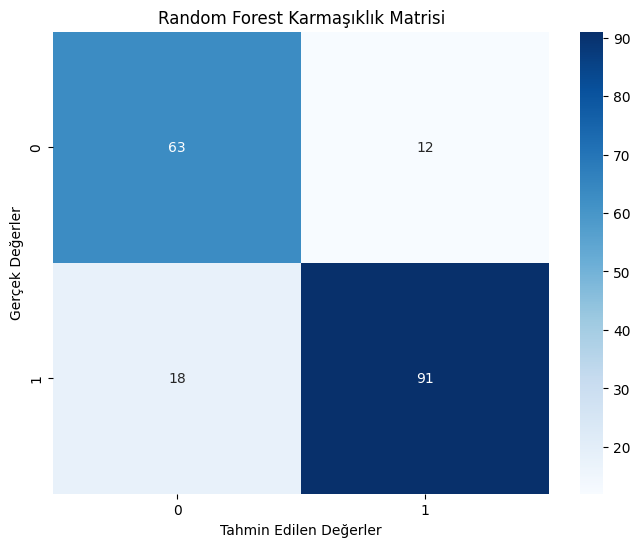


Logistic Regression Sonuçları:
Eğitim Doğruluğu: 0.8315
Test Doğruluğu: 0.8261

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        75
           1       0.87      0.83      0.85       109

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



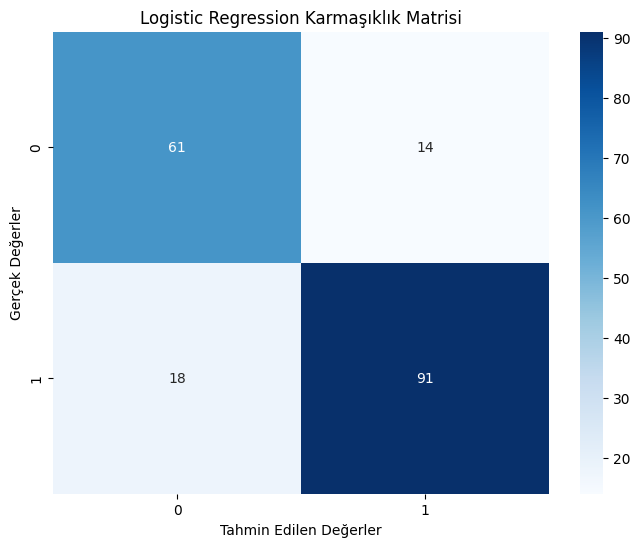

In [82]:
# ● Başarı metrikleri:
# ● Accuracy, Precision, Recall, F1-Score
# ● Confusion Matrix
# ● ROC-AUC eğrisi

# Modelleri eğitme ve değerlendirme
results = {}

for name, model in models.items():
    # Model eğitimi
    model.fit(X_train, y_train)

    # Test verisi tahminleri
    y_test_pred = model.predict(X_test)
    # Eğitim verisi tahminleri
    y_train_pred = model.predict(X_train)

    # Doğruluk hesaplamaları
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Sonuçları kaydetme
    results[name] = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'classification_report': classification_report(y_test, y_test_pred),
        'confusion_matrix': confusion_matrix(y_test, y_test_pred)
    }

    print(f"\n{name} Sonuçları:")
    print(f"Eğitim Doğruluğu: {train_acc:.4f}")
    print(f"Test Doğruluğu: {test_acc:.4f}")
    print("\nSınıflandırma Raporu:")
    print(results[name]['classification_report'])

    # Karmaşıklık matrisini görselleştirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Karmaşıklık Matrisi')
    plt.ylabel('Gerçek Değerler')
    plt.xlabel('Tahmin Edilen Değerler')
    plt.show()


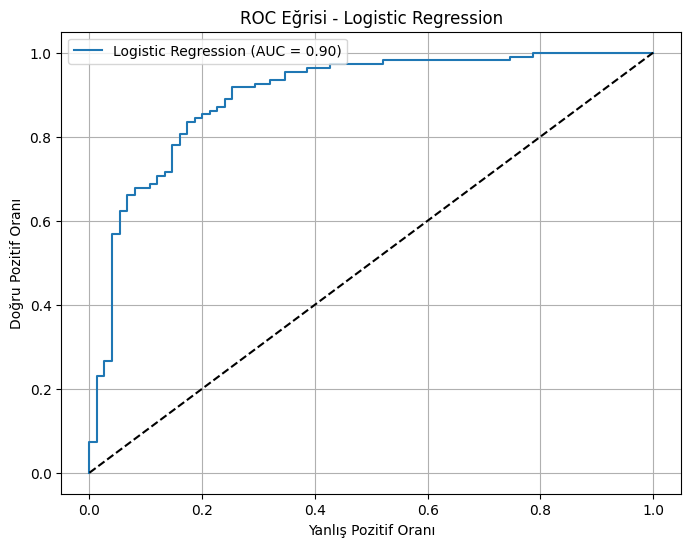

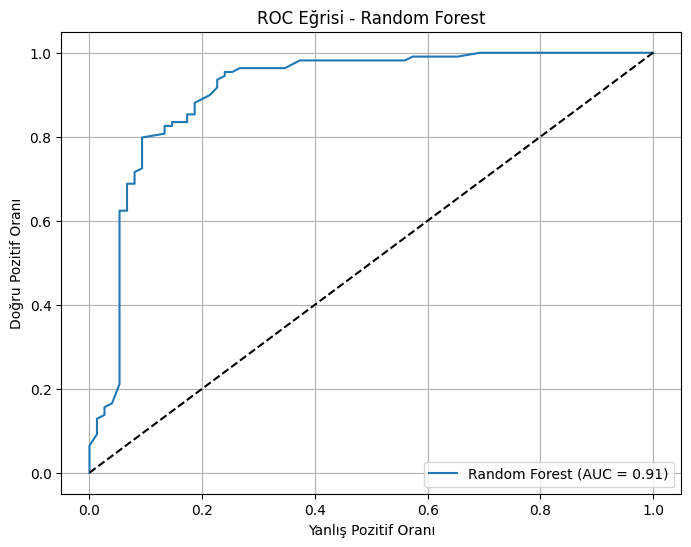

In [83]:
# Modeller için olasılık tahminlerini al (Pozitif sınıfın olasılığı)
y_score_lr = models['Logistic Regression'].predict_proba(X_test)[:, 1] # Pozitif sınıf (1) olasılıkları
y_score_rf = models['Random Forest'].predict_proba(X_test)[:, 1]     # Pozitif sınıf (1) olasılıkları

# ROC çizim fonksiyonu
plot_roc_auc_binary(y_test, y_score_lr, "Logistic Regression")
plot_roc_auc_binary(y_test, y_score_rf, "Random Forest")

#### **5. Model Karşılaştırması**

In [84]:
# Hangi model daha iyi performans verdi?
best_model_name = max(results.items(), key=lambda x: x[1]['test_accuracy'])[0]
print(f"\nEn iyi model: {best_model_name}")


En iyi model: Random Forest


**Hangi metrik üzerinde öne çıktı?**

- Doğruluk (Accuracy):

  -- Random Forest:	0.8261

  -- Logistic Regression: 0.8370

  Random Forest, doğruluk açısından biraz daha iyi.

- F1-score (Ortalama):

  -- Random Forest: 0.84 (weighted avg)

  -- Logistic Regression:	0.83 (weighted avg)

  Random Forest, F1-score açısından da önde.

- Precision ve Recall (Genel Ortalama):

  -- Random Forest: precision 0.84, recall 0.84

  -- Logistic Regression: precision 0.83, recall 0.83

  Random Forest, hem precision hem de recall'da biraz daha iyi.

Sonuç olarak, genel olarak tüm metriklerde Random Forest modeli, Logistic Regression'a göre daha iyi performans göstermektedir. Özellikle doğruluk ve F1-score gibi özet performans göstergeleri açısından öne çıkmaktadır.

**Aşırı öğrenme veya yetersiz öğrenme gözlendi mi?**

Random Forest --> Eğitim Doğruluğu:	1.0000 (yani %100), Test Doğruluğu:	0.8370 (Yani %83.7 doğruluk)

Eğitim verisini tam öğrenmiş, yani %100 doğruluk → bu model, veriye fazla uyum sağlamış.

Ancak test verisinde hâlâ yüksek başarı (%83.7) elde ettiği için aşırı öğrenme riski olsa da, bu etkili kontrol altına alınmış diyebiliriz.

Yani bu durumda model "hafif overfit" olabilir ama genelleme yeteneği halen güçlü.

Sonuç: Aşırı öğrenme kısmen gözlenebilir, ancak model hâlâ güçlü performans gösteriyor.


Logistic  --> Eğitim Doğruluğu:	0.8315, Test Doğruluğu:	0.8261

Eğitim ve test doğrulukları birbirine çok yakın.

Bu, modelin veriyi ne ezberlediğini ne de yetersiz öğrendiğini gösterir.

Logistic Regression daha basit bir model olduğu için genellikle overfit riski düşüktür — bu durum da onu doğruluyor.

Sonuç: Aşırı öğrenme veya yetersiz öğrenme gözlenmedi. Model oldukça dengeli çalışıyor.

#### **6. Sonuç ve Yorumlar**

Model karşılaştırmaları sonucunda:

- Random Forest, hem genel başarı hem de hasta sınıflarını ayırt etme açısından daha başarılıdır.

- ROC eğrisi, özellikle hasta olan bireyleri doğru tahmin etme kabiliyeti açısından Random Forest modelini öne çıkarmaktadır.

- Sağlık gibi kritik alanlarda Recall ve ROC-AUC daha önemli olduğundan, uygulamada Random Forest tercih edilmelidir.

**Sonraki Adımlar**

- Daha fazla model (XGBoost, SVM, KNN) ile karşılaştırma yapmak

### **Ekstra**

**Hiperparametre Optimizasyonu (GridSearchCV)**

Modellerin performansını artırmak için hiperparametre ayarlaması yapalım. `GridSearchCV` kullanarak farklı hiperparametre kombinasyonlarını deneyeceğiz.

In [85]:
# GridSearchCV ile hiperparametre optimizasyonu

# Hiper parametre grid'lerini tanımlama
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }
}

In [86]:
# GridSearchCV için model ve parametre grid'ini seçme
model = models[best_model_name]
param_grid = param_grids[best_model_name]

In [87]:
# GridSearchCV ile hiper parametre optimizasyonu
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [88]:
# GridSearchCV'yi çalıştırma
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve skoru yazdırma
print("\nEn iyi parametreler:")
print(grid_search.best_params_)
print(f"\nEn iyi cross-validation skoru: {grid_search.best_score_:.4f}")

# En iyi model ile test seti üzerinde tahmin
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

En iyi parametreler:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

En iyi cross-validation skoru: 0.8289


GridSearchCV, Random Forest modelinin farklı ayarlarını test ederek en iyi hiperparametre kombinasyonunu otomatik olarak buldu.

5 katlı çapraz doğrulama (5-fold CV) sonucunda elde edilen %82.89 doğruluk, modelin farklı veri alt kümelerinde istikrarlı performans gösterdiğini kanıtlar.

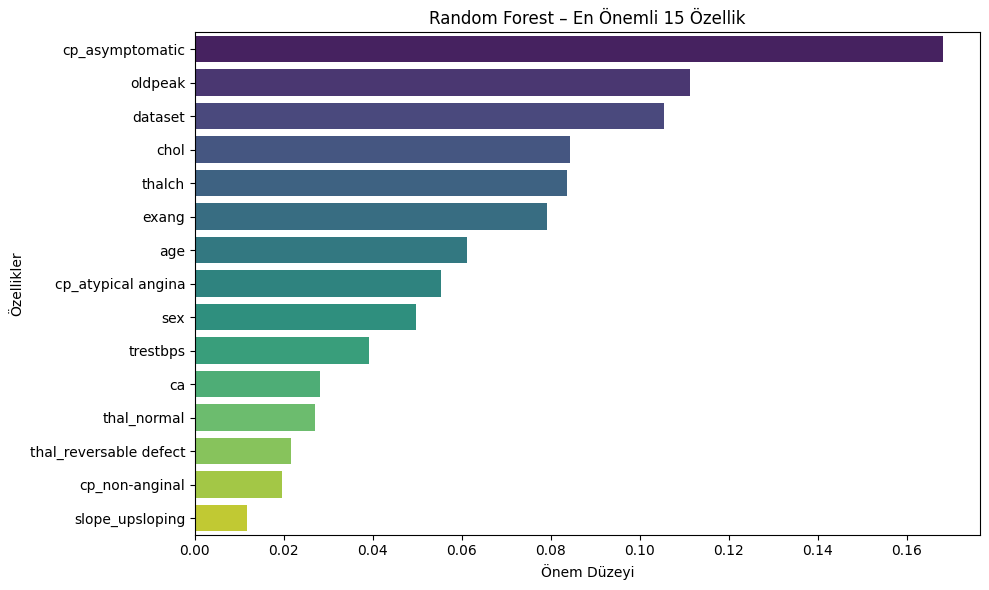

In [89]:
# Özellik isimleri
feature_names = X.columns

# Feature importances (önem değerleri)
importances = best_model.feature_importances_

# DataFrame’e çevirip sıralayalım
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Random Forest – En Önemli 15 Özellik")
plt.xlabel("Önem Düzeyi")
plt.ylabel("Özellikler")
plt.tight_layout()
plt.show()
